<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Set-Up-Virtual-Environment-&amp;-Import-Modules" data-toc-modified-id="Set-Up-Virtual-Environment-&amp;-Import-Modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set Up Virtual Environment &amp; Import Modules</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#Basic-Exploration-&amp;-Cleaning" data-toc-modified-id="Basic-Exploration-&amp;-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basic Exploration &amp; Cleaning</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Tickets-Over-Time-(Line-Chart)" data-toc-modified-id="Tickets-Over-Time-(Line-Chart)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Tickets Over Time (Line Chart)</a></span></li><li><span><a href="#Average-Number-of-Tickets-per-Weekday-(Column-Chart)" data-toc-modified-id="Average-Number-of-Tickets-per-Weekday-(Column-Chart)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Average Number of Tickets per Weekday (Column Chart)</a></span></li><li><span><a href="#Top-Vehicle-Makes-(Column-Chart-&amp;-Word-Cloud)" data-toc-modified-id="Top-Vehicle-Makes-(Column-Chart-&amp;-Word-Cloud)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Top Vehicle Makes (Column Chart &amp; Word Cloud)</a></span></li><li><span><a href="#Tickets-Over-Time-Total-vs-Ford-(Line-Chart-with-Subplots)" data-toc-modified-id="Tickets-Over-Time-Total-vs-Ford-(Line-Chart-with-Subplots)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Tickets Over Time Total vs Ford (Line Chart with Subplots)</a></span></li><li><span><a href="#Tickets-by-State-(Map)" data-toc-modified-id="Tickets-by-State-(Map)-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Tickets by State (Map)</a></span></li></ul></li><li><span><a href="#Some-Other-Useful-Code" data-toc-modified-id="Some-Other-Useful-Code-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Some Other Useful Code</a></span></li></ul></div>

# Overview

The data we are going to work with can be found here: https://www.kaggle.com/new-york-city/nyc-parking-tickets?select=Parking_Violations_Issued_-_Fiscal_Year_2016.csv. This is quite a large file at 2GB. The data relates to parking tickets issued in the 2016 fiscal year (July 2015 - July 2016). We are going to look at creating some plots with the data. 

It is easy to forget the code required to make different changes to plots such as titles, colors, font sizes etc. The code in this notebook can be used as a reference when creating plots for other projects.

# Set Up Virtual Environment & Import Modules

In [1]:
# # set up your virtual environment
# !pip install virtualenv
# !virtualenv .plots_venv
# !source .plots_venv/bin/activate

In [2]:
# !pip install pandas
# !pip install seaborn
# !pip install plotly
# !pip install cufflinks
# !pip install us
# !pip install wordcloud
# !pip install psutil
# !pip install kaleido

In [3]:
import os
import pandas as pd
import re
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import requests
from wordcloud import WordCloud

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import us
from census import Census
from us import states
import psutil

# Read in Data

In [4]:
df = pd.read_csv('../Parking_Violations_Issued_-_Fiscal_Year_2016.csv')

/Users/aislingtowey/plots_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning:

Columns (17,18,20,21,22,23,29,30,31,32,34,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.



# Basic Exploration & Cleaning

In [5]:
df.head()

Summons Number Plate ID Registration State Plate Type  Issue Date  \
0      1363745270  GGY6450                 99        PAS  07/09/2015   
1      1363745293   KXD355                 SC        PAS  07/09/2015   
2      1363745438  JCK7576                 PA        PAS  07/09/2015   
3      1363745475  GYK7658                 NY        OMS  07/09/2015   
4      1363745487  GMT8141                 NY        PAS  07/09/2015   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0              46               SDN        HONDA              P             0   
1              21              SUBN        CHEVR              P         55730   
2              21               SDN        ME/BE              P         42730   
3              21              SUBN        NISSA              P         58130   
4              21               P-U        LINCO              P         58130   

   ...  Hydrant Violation  Double Parking Violation  Latitude  Longitude  \
0  ...                NaN                       NaN       NaN        NaN   
1  ...                NaN                       NaN       NaN        NaN   
2  ...                NaN                       NaN       NaN        NaN   
3  ...                NaN                       NaN       NaN        NaN   
4  ...                NaN                       NaN       NaN        NaN   

   Community Board  Community Council   Census Tract BIN BBL NTA  
0              NaN                 NaN           NaN NaN NaN NaN  
1              NaN                 NaN           NaN NaN NaN NaN  
2              NaN                 NaN           NaN NaN NaN NaN  
3              NaN                 NaN           NaN NaN NaN NaN  
4              NaN                 NaN           NaN NaN NaN NaN  

[5 rows x 51 columns]

In [6]:
# we are going to focus on a couple of columns and rename them
df = df[['Issue Date', 'Summons Number', 'Registration State', 'Vehicle Make']]
df.columns = ['issue_date', 'summons_number', 'reg_state', 'vehicle_make']
df.head()

issue_date  summons_number reg_state vehicle_make
0  07/09/2015      1363745270        99        HONDA
1  07/09/2015      1363745293        SC        CHEVR
2  07/09/2015      1363745438        PA        ME/BE
3  07/09/2015      1363745475        NY        NISSA
4  07/09/2015      1363745487        NY        LINCO

In [7]:
print(type(df['issue_date'][0])) # the date is a str so we need to convert it to datetime
df['issue_date'] = pd.to_datetime(df['issue_date'])
print(f'Min date: {df["issue_date"].min()}')
print(f'Max date: {df["issue_date"].max()}')

<class 'str'>
Min date: 1970-04-13 00:00:00
Max date: 2069-10-02 00:00:00


The data is meant to be from the fiscal year between July 2015 to July 2016. The min and max dates above show that all data does not fall in this range and there must have been some data entry mistakes. As the aim of this notebook is to create some plots we are going to remove any entries outside of this time frame, which is about 300,000 of 10 million entries.

In [8]:
df = df.loc[(df['issue_date']>'2015-07-01')&(df['issue_date']<'2016-07-01')]

Check for nulls in all columns. For simplicity we will remove any rows with null values.

In [9]:
print(df.isnull().sum()) # show number of nulls in each column
df = df.dropna(how='any',axis=0) # remove nulls

issue_date            0
summons_number        0
reg_state             0
vehicle_make      60136
dtype: int64


In [10]:
print(f'Number of states in reg_state column: {len(df.reg_state.value_counts())}') # will have to look into this later as there is only 50 states
print(f'Number of makes in vehicle_make column: {len(df.vehicle_make.value_counts())}')

Number of states in reg_state column: 68
Number of makes in vehicle_make column: 5757


# Plots

## Tickets Over Time (Line Chart)

We want to see the number of tickets issued per day over time.

In [11]:
ticket_count = df.groupby('issue_date').count()
ticket_count = ticket_count[['summons_number']]
ticket_count = ticket_count.rename(columns={'index' :'date', 'summons_number' :'count'})

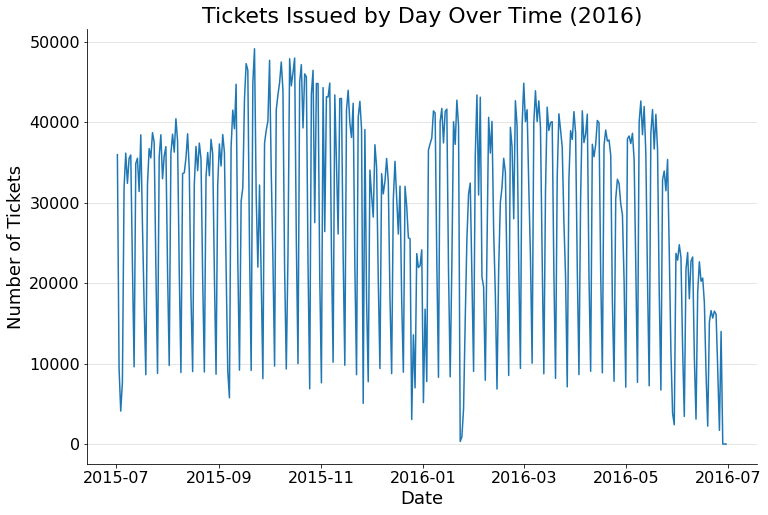

In [12]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x = ticket_count.index, y = 'count', data = ticket_count, palette="GnBu_d")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Number of Tickets', fontsize=18)
ax.set_title('Tickets Issued by Day Over Time (2016)', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=16)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(True, alpha=0.4) # add horizontal grid

# ax.xaxis.set_major_formatter(plt.FixedFormatter(ticket_count.index.strftime("%Y-%m")))
# ax.tick_params(axis='both', which='major', labelsize=14)

# only display every x tick label,
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1 == 0:  # every x label is kept
        label.set_visible(True),
    else:
        label.set_visible(False)

# plt.savefig('tickets_over_time.png', transparent=True)

# date_form = DateFormatter("%Y - %d")
# ax.xaxis.set_major_formatter(date_form)

Ticket volume appeared to decrease at Christmas and in June 2016. There also appears to be a weekly seasonality possibly because fewer tickets are issued on the weekend. We will investigate in the next Section 5.2.

## Average Number of Tickets per Weekday (Column Chart)

We want to understand on which days of the week on average were the most and least tickets issued.

In [13]:
data = df.copy()
data['day'] = data['issue_date'].dt.day_name()
data.head()

# if you want to use the datetime as the index use the below
# data = data.set_index('issue_date')
# tickets_by_day = pd.DataFrame(data.resample('D')['summons_number'].count())

issue_date  summons_number reg_state vehicle_make       day
0 2015-07-09      1363745270        99        HONDA  Thursday
1 2015-07-09      1363745293        SC        CHEVR  Thursday
2 2015-07-09      1363745438        PA        ME/BE  Thursday
3 2015-07-09      1363745475        NY        NISSA  Thursday
4 2015-07-09      1363745487        NY        LINCO  Thursday

In [14]:
# first get the count of tickets for each date and assign each date it's week day name
tickets_by_day = pd.DataFrame(data.groupby(['issue_date'])['day'].count())
tickets_by_day['day_name'] = tickets_by_day['day'].index.day_name()
tickets_by_day.head()

day  day_name
issue_date                 
2015-07-02  35948  Thursday
2015-07-03   9422    Friday
2015-07-04   4098  Saturday
2015-07-05   7647    Sunday
2015-07-06  31866    Monday

In [15]:
# now get the mean of each day name across the year
tickets_by_day_mean = tickets_by_day.groupby(tickets_by_day.day_name).mean()
tickets_by_day_mean.columns = ['average_tickets']

# order the days so they plot in the correct order
tickets_by_day_mean.index = pd.Categorical(tickets_by_day_mean.index, categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
tickets_by_day_mean = tickets_by_day_mean.sort_index()
tickets_by_day_mean

average_tickets
Monday        31823.750000
Tuesday       35684.384615
Wednesday     33290.173077
Thursday      35901.792453
Friday        33698.615385
Saturday      19195.942308
Sunday         7839.865385

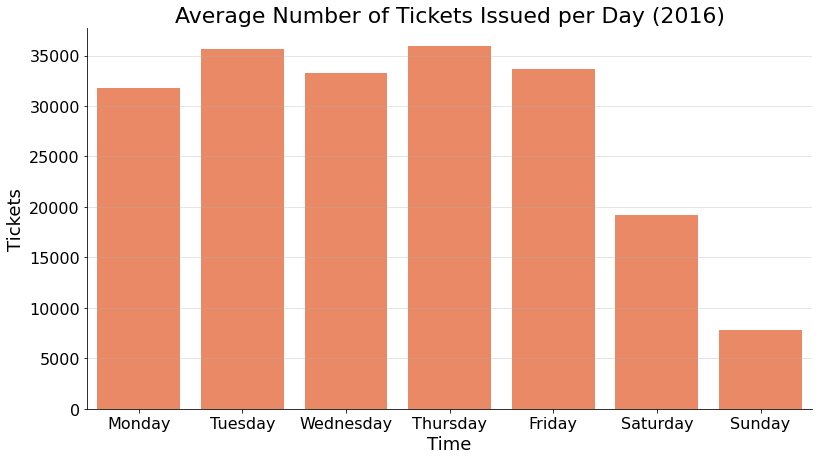

In [16]:
plt.figure(figsize=(13,7))

ax = sns.barplot(x = tickets_by_day_mean.index, y = 'average_tickets', data = tickets_by_day_mean, color='coral')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Tickets', fontsize=18)
ax.set_title('Average Number of Tickets Issued per Day (2016)', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=16)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(True, alpha=0.4) # add horizontal grid

Fewer tickets on average are issued on weekend days than week days.

## Top Vehicle Makes (Column Chart & Word Cloud)

We want to understand which vechicle make had the most tickets issued.

In [17]:
frame = pd.DataFrame(df['vehicle_make'].value_counts(normalize = True))
frame = frame.reset_index()
frame = frame.rename(columns={'index' :'vehicle_make', 'vehicle_make' :'percentage'})
frame['percentage'] = round(frame['percentage']*100, 1)
frame = frame[0:10].round(2)
frame

vehicle_make  percentage
0         FORD        12.5
1        TOYOT        10.9
2        HONDA         9.6
3        NISSA         7.9
4        CHEVR         7.2
5        FRUEH         4.0
6        ME/BE         3.4
7        DODGE         3.4
8          BMW         3.3
9         JEEP         2.9

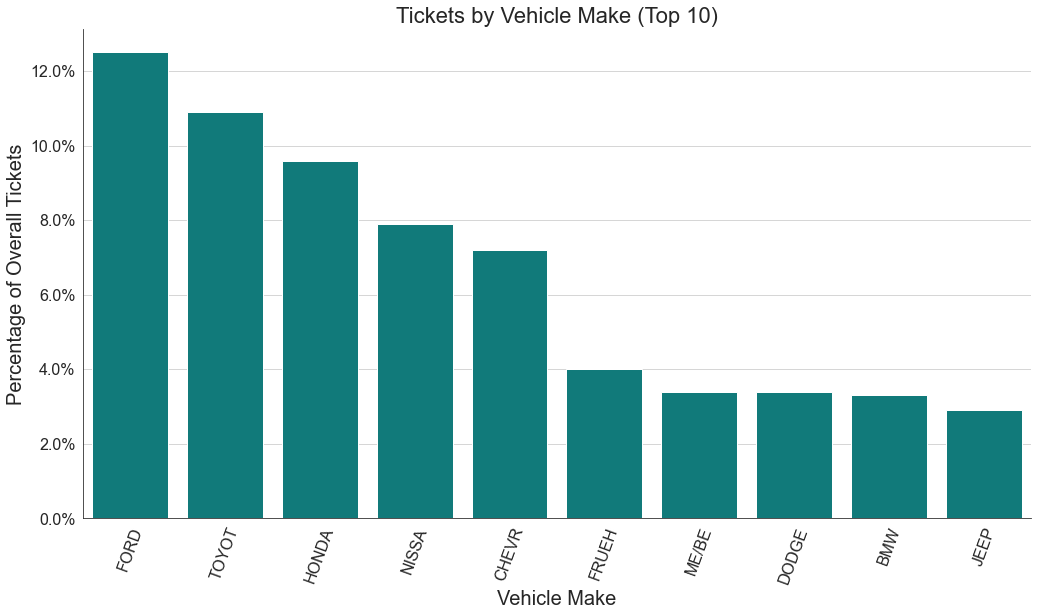

In [18]:
sns.set_style("white")
plt.figure(figsize=(17,9))

# if we want to highlight a certain column a different colour
# frame['colour'] = '#16A085'
# clrs = list(frame['colour'])
# clrs[-5] = '#ea4335'
# if doing the above need to change palette=clrs in sns.barplot

ax=sns.barplot(x='vehicle_make', y='percentage',data=frame, dodge = False, color='darkcyan') 
# palette=clrs
# palette="GnBu_d"

for item in ax.get_xticklabels():
    item.set_rotation(70)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.yaxis.grid(True)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Vehicle Make', fontsize=20)
ax.set_ylabel('Percentage of Overall Tickets', fontsize=20)
plt.title('Tickets by Vehicle Make (Top 10)', fontsize=22)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig('tickets_by_make.png', transparent=True)

Ford, Toyota and Honda make up about a third of all tickets issued.

Like them or hate them here's a word cloud showing the same information!

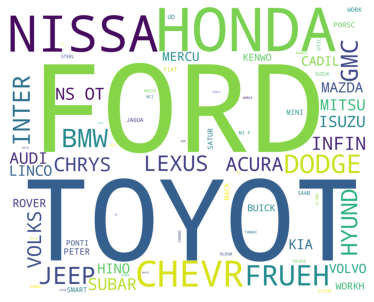

In [19]:
text = [[df['vehicle_make']]]
wordcloud = WordCloud(width = 1500, height = 1200,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df['vehicle_make'].sample(80000)))

# plot the WordCloud image                       
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## Tickets Over Time Total vs Ford (Line Chart with Subplots)

Lets check if the Ford tickets by day over time matches the trend of the overall tickets by day.

In [20]:
ticket_count.reset_index(inplace=True)

ford_df = df.loc[df['vehicle_make']=='FORD']
ticket_count_ford = ford_df.groupby('issue_date').count()
ticket_count_ford = ticket_count_ford[['summons_number']]
ticket_count_ford = ticket_count_ford.rename(columns={'index' :'date', 'summons_number' :'count_ford'})
timeseries_ticket_counts_df = ticket_count.merge(ticket_count_ford, on='issue_date')

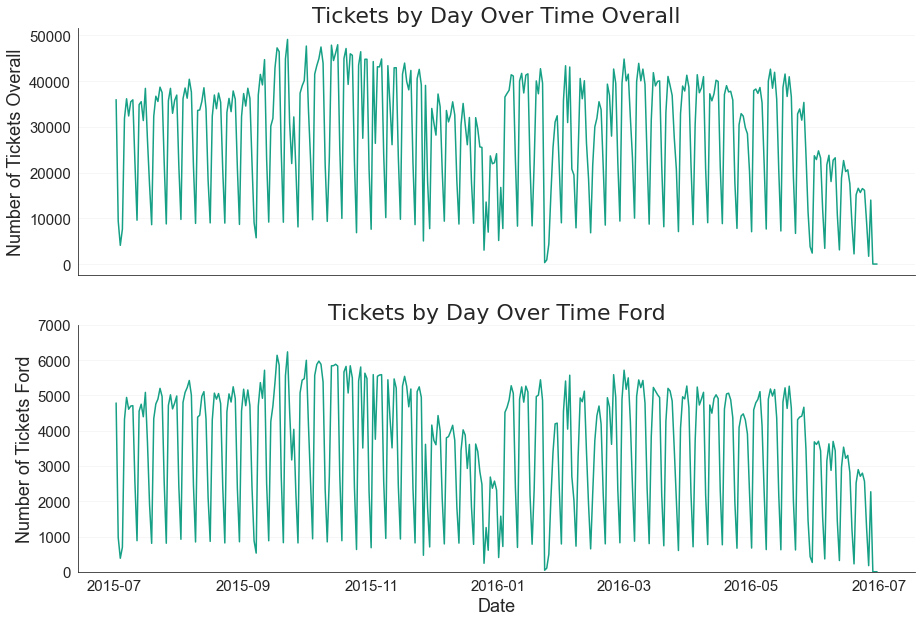

In [21]:
# create multiple subplots in a plot
fig, axes = plt.subplots(2,1, figsize=(15, 10), sharey=False, sharex=True)
# fig.suptitle('test')

ax1 = sns.lineplot(ax = axes[0], x = 'issue_date', y = 'count', data = timeseries_ticket_counts_df, color='#16A085')
ax2 = sns.lineplot(ax = axes[1], x =  'issue_date', y = 'count_ford', data = timeseries_ticket_counts_df, color='#16A085')

ax1.set_ylabel('Number of Tickets Overall', fontsize=18)
ax1.set_title('Tickets by Day Over Time Overall', fontsize=22, fontdict={'fontfamily' : 'DejaVu Sans'})
ax1.tick_params(axis='both', which='major', labelsize=15)

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.grid(True, alpha=0.2) # add horizontal grid\n",

ax2.set_xlabel('Date', fontsize=18)
ax2.set_ylabel('Number of Tickets Ford', fontsize=18)
ax2.set_title('Tickets by Day Over Time Ford', fontsize=22, fontdict={'fontfamily' : 'DejaVu Sans'})
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_ylim(0, 7000) # the ford values are a lot smaller to we reduce the ylim

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.grid(True, alpha=0.2) # add horizontal grid

# date_form = DateFormatter("%b - %d")
# ax2.xaxis.set_major_formatter(date_form)

The trend in Ford tickets is very similar to to overall trend just with lower volumes.

## Tickets by State (Map)

Here we want to understand which states received the most and least tickets. We will illustrate this using a Plotly map. Here is a useful tutorial on Plotly maps: https://www.kdnuggets.com/2020/09/geographical-plots-python.html

In [22]:
print(f'Number of states in reg_state column: {len(df.reg_state.value_counts())}')

Number of states in reg_state column: 68


There appears to be 68 states in the reg state column. As there are only 50 states, some of these must be incorrect or there may be multiple abbreviations for a single state. We will keep entries with a correct state for this plot. We will use the us module to get a list of states to compare to our data and identify incorrect states.

In [23]:
us_states_mapping = us.states.mapping('name', 'abbr')
us_state_abbreviations = list(us_states_mapping.values())
len(us_state_abbreviations) # this list appears to have 59 state abbreviations, we will assume some states can take 2 abbreviations
df_states = df.loc[df['reg_state'].isin(us_state_abbreviations)]

In [24]:
# now we will get a count of tickets for each state
tickets_by_state = pd.DataFrame(df_states.groupby(['reg_state'])['vehicle_make'].count())
tickets_by_state.reset_index(inplace=True)
tickets_by_state.columns=['reg_state', 'count_of_tickets']
tickets_by_state.head()

reg_state  count_of_tickets
0        AK               908
1        AL              7506
2        AR              3066
3        AZ             25254
4        CA             22553

In [25]:
# plot the count of tickets by state
data = dict(
        type = 'choropleth',
        colorscale = 'Oranges',
        locations = tickets_by_state['reg_state'],
        locationmode =  "USA-states",
        z = tickets_by_state['count_of_tickets'],
        text = tickets_by_state['reg_state'],
        colorbar = {'title' : 'Number of Tickets'}
      )

layout = dict(title = '2016 Parking Tickets by US State',
              geo = dict(projection = {'type':'mercator'}),
              mapbox=dict(zoom=500)
             )

fig = go.Figure(data = [data],layout = layout)
fig.update_geos(projection_type="orthographic", visible=True, resolution=50, scope="north america")
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0))
# iplot(fig,validate=False)
fig.show("svg")

There was a lot more tickets issued in the states of New York and New Jersey than the other US states. We will check if size of population is the reason for this. We can get the population of each state using the US census API and the python requests package. We will then use the population of each state to get the number of tickets issued per capita in each state.

In [26]:
# first create our base url
HOST = 'https://api.census.gov/data' # the api we will use
year='2010' # 2016 is not available
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])

# the census api calls the parameters for the request predicates
predicates = {} 
get_vars = ['NAME', 'P001001'] #'P001001' is the population
predicates['get'] = ",".join(get_vars)
predicates['for'] = "state:*" # we want the population for each state
response = requests.get(base_url, params=predicates) # now request the data from the api
# response.text

In [27]:
# we want to take or request response and put it in a nice format
col_names = ['name', 'total_pop', 'state'] # give the columns cleaner names
state_pop_df = pd.DataFrame(columns=col_names, data=response.json()[1:]) # make a pandas df with the columns and the new names
state_pop_df['total_pop'] = state_pop_df['total_pop'].astype(int)

# we want to map the state names to our abbreviations so we can join to our tickets df which only has abbreviations
state_pop_df['state_abbr'] = state_pop_df['name'].map(us_states_mapping)
state_with_pop_df = tickets_by_state.merge(state_pop_df, left_on='reg_state', right_on='state_abbr', suffixes=('_left', '_right'))

# now to get tickets issued per capita by state we divide the tickets by the population for each state
state_with_pop_df['tickets_per_capita'] = (state_with_pop_df['count_of_tickets']/state_with_pop_df['total_pop'])*100
state_with_pop_df.head()

reg_state  count_of_tickets        name  total_pop state state_abbr  \
0        AK               908      Alaska     710231    02         AK   
1        AL              7506     Alabama    4779736    01         AL   
2        AR              3066    Arkansas    2915918    05         AR   
3        AZ             25254     Arizona    6392017    04         AZ   
4        CA             22553  California   37253956    06         CA   

   tickets_per_capita  
0            0.127846  
1            0.157038  
2            0.105147  
3            0.395087  
4            0.060539

In [28]:
# now lets replot
data_per_capita = dict(
        type = 'choropleth',
        colorscale = 'Oranges',
        locations = state_with_pop_df['reg_state'],
        locationmode =  "USA-states",
        z = state_with_pop_df['tickets_per_capita'],
        text = state_with_pop_df['reg_state'],
        colorbar = {'title' : 'Number of Tickets Per Capita'}
      )

layout = dict(title = '2016 Parking Tickets by US State (Per Capita)',
              geo = dict(projection = {'type':'mercator'}),
              mapbox=dict(zoom=500)
             )

fig = go.Figure(data = [data_per_capita],layout = layout)
fig.update_geos(projection_type="orthographic", visible=True, resolution=50, scope="north america", showcountries=False)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0))
# iplot(fig,validate=False)
fig.show("svg")

Again this plot is not very useful as New York and New Jersey also have a very high number of tickets issued per capita compared to other states. Connecticut is also quite high. This is useful information but it does not tell us much about this other states. To learn more about the other states we will exclude these 3 states from the data.

In [29]:
state_with_pop_df = state_with_pop_df.loc[~state_with_pop_df['reg_state'].isin(['NY', 'NJ', 'CT'])]

data_per_capita = dict(
        type = 'choropleth',
        colorscale = 'Oranges',
        locations = state_with_pop_df['reg_state'],
        locationmode =  "USA-states",
        z = state_with_pop_df['tickets_per_capita'],
        text = state_with_pop_df['reg_state'],
        colorbar = {'title' : 'Number of Tickets Per Capita'}
      )

layout = dict(title = '2016 Parking Tickets by US State Exclusing NY, NJ & CT (Per Capita)',
              geo = dict(projection = {'type':'mercator'}), 
              mapbox=dict(zoom=3))

fig = go.Figure(data = [data_per_capita], layout = layout)
fig.update_geos(projection_type="orthographic", visible=True, resolution=50, scope="north america", showcountries=False)
fig.update_layout(height=500, margin={"r":0,"t":50,"l":0,"b":0})
# fig.layout.template = None
# iplot(fig,validate=False)
fig.show("svg")

Now the plot has more insights and it appears states in the east were issued a lot more tickets per capita than states in the west.

# Some Other Useful Code

If we want to plot a time series but some timestamps are missing we will get an error so we need to add these timestamps and assign the value 0 to them.

In [30]:
# generate timestamps in case there are any missing and merge then merge them with data
from datetime import datetime
timestamps = pd.DataFrame({
    'time_interval' : pd.date_range(
    start=datetime(2021, 1, 1, 0, 0, 0),
    end=datetime(2021, 1, 18, 0, 0, 0),
    freq='D'
    )})

# plot_data = timestamps.merge(all_data, how='left', on='time_interval')
# plot_data = plot_data.fillna(0)

Average Number of Tickets Per Hour (Column Chart) - If our date column had the time the tickets were issued we could use the following code to look at the the average number of tickets that were handed out for each hour in the day.

In [31]:
# tickets = tickets.set_index('issued_date_time')
# tickets.info()

# new_df = tickets.resample('H')['text'].count()
# new_df = pd.DataFrame(new_df)                   
# new_df.columns = ['count']
# new_df

# avg_count_per_hours = pd.DataFrame(pd.to_numeric(round(new_df.groupby(new_df.index.hour)['count'].mean()), downcast='signed'))
# avg_count_per_hours.index = pd.to_timedelta(avg_count_per_hours.index, unit='h') # convert hours back to timestamps
# avg_count_per_hours.index = pd.to_datetime(avg_count_per_hours.index) # we will ignore the year in the plot
# avg_count_per_hours 

# plt.figure(figsize=(15,9))

# ax = sns.barplot(x = avg_count_per_hours.index, y = 'count', data = avg_count_per_hours , color='burlywood')
# ax.set_xlabel('Time', fontsize=18)
# ax.set_ylabel('Number of Queries', fontsize=18)
# # ax.set_title('Average Number of Queries per Hour', fontsize=22)
# ax.tick_params(axis='both', which='major', labelsize=16)

# # Hide the right and top spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.grid(True, alpha=0.4) # add horizontal grid

# date_form = DateFormatter("%H")
# ax.xaxis.set_major_formatter(date_form)